# **Análisis de Evasión de Clientes Telecom X**

## **Extracción de Datos**

In [1]:
import requests
import pandas as pd

In [5]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

res = requests.get(url)
data = res.json()

df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [6]:
df_telecomx = pd.json_normalize(data)
df_telecomx.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## **Transformación**

### 1. Verificación de valores nulos por columna

In [7]:
df_telecomx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

### 2. Verificación de datos únicos por columna

In [27]:
for col in df_telecomx.columns:
    print(f'{col}: {df_telecomx[col].unique()}')

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
customer.gender: ['Female' 'Male']
customer.SeniorCitizen: [0 1]
customer.Partner: ['Yes' 'No']
customer.Dependents: ['Yes' 'No']
customer.tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
phone.PhoneService: ['Yes' 'No']
phone.MultipleLines: ['No' 'Yes' 'No phone service']
internet.InternetService: ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity: ['No' 'Yes' 'No internet service']
internet.OnlineBackup: ['Yes' 'No' 'No internet service']
internet.DeviceProtection: ['No' 'Yes' 'No internet service']
internet.TechSupport: ['Yes' 'No' 'No internet service']
internet.StreamingTV: ['Yes' 'No' 'No internet service']
internet.StreamingMovies: ['No' 'Yes' 'No internet service']
account.Contrac

#### Transformación en Columna 'SeniorCitizen'

In [28]:
df_telecomx['customer.SeniorCitizen'] = df_telecomx['customer.SeniorCitizen'].replace({0: 'No', 1: 'Yes'})
df_telecomx

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,No,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,No,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,No,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,No,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


### 3. Verificación de valores nulos y vacíos

In [43]:
for col in df_telecomx.columns:
    print(f'Valores nulos en {col}: {df_telecomx[col].isnull().sum()}')

Valores nulos en customerID: 0
Valores nulos en Churn: 0
Valores nulos en customer.gender: 0
Valores nulos en customer.SeniorCitizen: 0
Valores nulos en customer.Partner: 0
Valores nulos en customer.Dependents: 0
Valores nulos en customer.tenure: 0
Valores nulos en phone.PhoneService: 0
Valores nulos en phone.MultipleLines: 0
Valores nulos en internet.InternetService: 0
Valores nulos en internet.OnlineSecurity: 0
Valores nulos en internet.OnlineBackup: 0
Valores nulos en internet.DeviceProtection: 0
Valores nulos en internet.TechSupport: 0
Valores nulos en internet.StreamingTV: 0
Valores nulos en internet.StreamingMovies: 0
Valores nulos en account.Contract: 0
Valores nulos en account.PaperlessBilling: 0
Valores nulos en account.PaymentMethod: 0
Valores nulos en account.Charges.Monthly: 0
Valores nulos en account.Charges.Total: 0


In [44]:
df_telecomx.apply(lambda x: x.astype(str).str.strip() == '').sum()


customerID                     0
Churn                        224
customer.gender                0
customer.SeniorCitizen         0
customer.Partner               0
customer.Dependents            0
customer.tenure                0
phone.PhoneService             0
phone.MultipleLines            0
internet.InternetService       0
internet.OnlineSecurity        0
internet.OnlineBackup          0
internet.DeviceProtection      0
internet.TechSupport           0
internet.StreamingTV           0
internet.StreamingMovies       0
account.Contract               0
account.PaperlessBilling       0
account.PaymentMethod          0
account.Charges.Monthly        0
account.Charges.Total         11
dtype: int64

#### Corrección de datos vacíos

In [52]:
df_telecomx['account.Charges.Total'] = pd.to_numeric(df_telecomx['account.Charges.Total'], errors = 'coerce')
print(df_telecomx['account.Charges.Total'].dtype)

float64


In [55]:
df_telecomx = df_telecomx[df_telecomx['Churn'].str.strip() != '']
print('Número de filas' ,len(df_telecomx))

Número de filas 7043


In [56]:
df_telecomx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   object 
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [57]:
df_telecomx = df_telecomx.dropna(subset = ['account.Charges.Total'])
df_telecomx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   object 
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.TechSupport       7032 non-null   object 
 1

### 4. Cambiar nombre de columnas

In [61]:
df_telecomx.columns = ['id_cliente', 'evasion_cliente', 'genero', 'mayor_que_65', 'tiene_pareja', 'tiene_dependientes', 'meses_contrato', 'tiene_servicio_telefonico', 'tiene_multiples_lineas', 'tipo_internet', 'tiene_seguridad_online', 'tiene_respaldo_online', 'tiene_proteccion_adicional', 'tiene_soporte_tecnico', 'tiene_tv_streaming', 'tiene_peliculas_streaming', 'tipo_contrato', 'recibe_factura_online', 'metodo_pago', 'pago_mensual', 'pago_total']
df_telecomx.head()

,id_cliente,evasion_cliente,genero,mayor_que_65,tiene_pareja,tiene_dependientes,meses_contrato,tiene_servicio_telefonico,tiene_multiples_lineas,tipo_internet,...,tiene_proteccion_adicional,tiene_soporte_tecnico,tiene_tv_streaming,tiene_peliculas_streaming,tipo_contrato,recibe_factura_online,metodo_pago,pago_mensual,pago_total,pago_diario
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.187
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.997
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.267
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.797


## 5. Creación de columna pago diario

In [62]:
df_telecomx['pago_diario'] = (df_telecomx['pago_mensual'] / 30).round(3)
df_telecomx.head()

,id_cliente,evasion_cliente,genero,mayor_que_65,tiene_pareja,tiene_dependientes,meses_contrato,tiene_servicio_telefonico,tiene_multiples_lineas,tipo_internet,...,tiene_proteccion_adicional,tiene_soporte_tecnico,tiene_tv_streaming,tiene_peliculas_streaming,tipo_contrato,recibe_factura_online,metodo_pago,pago_mensual,pago_total,pago_diario
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.187
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.997
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.267
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.797


### 6. Traducción de información

In [63]:
df_telecomx['evasion_cliente'] = df_telecomx['evasion_cliente'].replace('Yes', 'Si')
df_telecomx['genero'] = df_telecomx['genero'].replace({'Female': 'Femenino', 'Male': 'Masculino'})
df_telecomx['tiene_pareja'] = df_telecomx['tiene_pareja'].replace('Yes', 'Si')
df_telecomx['tiene_dependientes'] = df_telecomx['tiene_dependientes'].replace('Yes', 'Si')
df_telecomx['tiene_servicio_telefonico'] = df_telecomx['tiene_servicio_telefonico'].replace('Yes', 'Si')
df_telecomx['tiene_multiples_lineas'] = df_telecomx['tiene_multiples_lineas'].replace({'Yes': 'Si', 'No phone service': 'No tiene servicio telefónico'})
df_telecomx['tipo_internet'] = df_telecomx['tipo_internet'].replace('Fiber optic', 'Fibra óptica')
df_telecomx['tiene_seguridad_online'] = df_telecomx['tiene_seguridad_online'].replace({'Yes': 'Si', 'No internet service': 'No tiene servicio de internet'})
df_telecomx['tiene_respaldo_online'] = df_telecomx['tiene_respaldo_online'].replace({'Yes': 'Si', 'No internet service': 'No tiene servicio de internet'})
df_telecomx['tiene_proteccion_adicional'] = df_telecomx['tiene_proteccion_adicional'].replace({'Yes': 'Si', 'No internet service': 'No tiene servicio de internet'})
df_telecomx['tiene_soporte_tecnico'] = df_telecomx['tiene_soporte_tecnico'].replace({'Yes': 'Si', 'No internet service': 'No tiene servicio de internet'})
df_telecomx['tiene_tv_streaming'] = df_telecomx['tiene_tv_streaming'].replace({'Yes': 'Si', 'No internet service': 'No tiene servicio de internet'})
df_telecomx['tiene_peliculas_streaming'] = df_telecomx['tiene_peliculas_streaming'].replace({'Yes': 'Si', 'No internet service': 'No tiene servicio de internet'})
df_telecomx['tipo_contrato'] = df_telecomx['tipo_contrato'].replace({'Month-to-month': 'Mes a mes', 'One year': 'Anual', 'Two year': 'Bianual'})
df_telecomx['recibe_factura_online'] = df_telecomx['recibe_factura_online'].replace('Yes', 'Si')
df_telecomx['metodo_pago'] = df_telecomx['metodo_pago'].replace({'Electronic check': 'Cheque electrónico', 'Mailed check': 'Cheque enviado por correo', 'Bank transfer (automatic)': 'Transferencia bancaria (automática)', 'Credit card (automatic)': 'Tarjeta de crédito (automática)'})

df_telecomx.head()

,id_cliente,evasion_cliente,genero,mayor_que_65,tiene_pareja,tiene_dependientes,meses_contrato,tiene_servicio_telefonico,tiene_multiples_lineas,tipo_internet,...,tiene_proteccion_adicional,tiene_soporte_tecnico,tiene_tv_streaming,tiene_peliculas_streaming,tipo_contrato,recibe_factura_online,metodo_pago,pago_mensual,pago_total,pago_diario
0,0002-ORFBO,No,Femenino,No,Si,Si,9,Si,No,DSL,...,No,Si,Si,No,Anual,Si,Cheque enviado por correo,65.6,593.30,2.187
1,0003-MKNFE,No,Masculino,No,No,No,9,Si,Si,DSL,...,No,No,No,Si,Mes a mes,No,Cheque enviado por correo,59.9,542.40,1.997
2,0004-TLHLJ,Si,Masculino,No,No,No,4,Si,No,Fibra óptica,...,Si,No,No,No,Mes a mes,Si,Cheque electrónico,73.9,280.85,2.463
3,0011-IGKFF,Si,Masculino,Yes,Si,No,13,Si,No,Fibra óptica,...,Si,No,Si,Si,Mes a mes,Si,Cheque electrónico,98.0,1237.85,3.267
4,0013-EXCHZ,Si,Femenino,Yes,Si,No,3,Si,No,Fibra óptica,...,No,Si,Si,No,Mes a mes,Si,Cheque enviado por correo,83.9,267.40,2.797


## **Carga y Análisis de Datos**

### 1. Análisis descriptivos

In [64]:
df_telecomx.describe()

,meses_contrato,pago_mensual,pago_total,pago_diario
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,2.159944
std,24.545260,30.085974,2266.771362,1.002870
min,1.000000,18.250000,18.800000,0.608000
25%,9.000000,35.587500,401.450000,1.186500
50%,29.000000,70.350000,1397.475000,2.345000
75%,55.000000,89.862500,3794.737500,2.995500
max,72.000000,118.750000,8684.800000,3.958000


### 2. Distribución de la evasión

In [66]:
import matplotlib.pyplot as plt

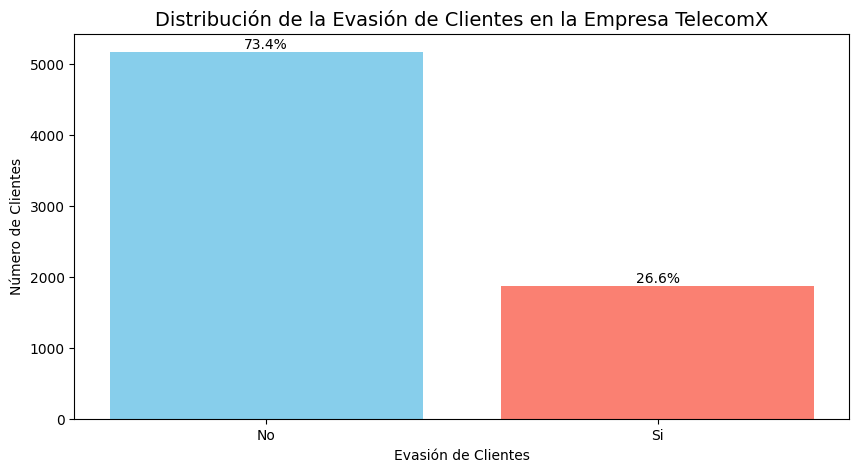

In [81]:
fig, ax = plt.subplots(figsize = (10,5))

cuenta_evasion = df_telecomx['evasion_cliente'].value_counts()
porcentaje_evasion = cuenta_evasion / len(df_telecomx) * 100

# df_telecomx['evasion_cliente'].value_counts().plot(kind = 'bar')

ax.bar(df_telecomx['evasion_cliente'].value_counts().index, df_telecomx['evasion_cliente'].value_counts().values, color = ['Skyblue', 'Salmon'])
ax.set_title('Distribución de la Evasión de Clientes en la Empresa TelecomX', fontsize = 14)
ax.set_xlabel('Evasión de Clientes')
ax.set_ylabel('Número de Clientes')
ax.xaxis.set_tick_params(rotation = 0)

for i, porcentaje in enumerate(porcentaje_evasion):
    ax.text(i, cuenta_evasion.iloc[i] + 50, f'{porcentaje:.1f}%', ha = 'center')

plt.show()

### 3. Evasión con respecto a variables categóriccas

In [76]:
import plotly.express as px

In [82]:
px.histogram(df_telecomx, x = 'genero', color = 'evasion_cliente', barmode = 'group', text_auto = True)

In [84]:
px.histogram(df_telecomx, x = 'mayor_que_65', color = 'evasion_cliente', barmode = 'group', text_auto = True)

In [85]:
px.histogram(df_telecomx, x = 'tiene_pareja', color = 'evasion_cliente', barmode = 'group', text_auto = True)

In [86]:
px.histogram(df_telecomx, x = 'tiene_dependientes', color = 'evasion_cliente', barmode = 'group', text_auto = True)

In [88]:
px.histogram(df_telecomx, x = 'tiene_servicio_telefonico', color = 'evasion_cliente', barmode = 'group', text_auto = True)

In [89]:
px.histogram(df_telecomx, x = 'tiene_multiples_lineas', color = 'evasion_cliente', barmode = 'group', text_auto = True)

In [90]:
px.histogram(df_telecomx, x = 'tipo_internet', color = 'evasion_cliente', barmode = 'group', text_auto = True)

In [91]:
px.histogram(df_telecomx, x = 'tiene_seguridad_online', color = 'evasion_cliente', barmode = 'group', text_auto = True)

In [92]:
px.histogram(df_telecomx, x = 'tipo_contrato', color = 'evasion_cliente', barmode = 'group', text_auto = True)

In [93]:
px.histogram(df_telecomx, x = 'recibe_factura_online', color = 'evasion_cliente', barmode = 'group', text_auto = True)

In [94]:
px.histogram(df_telecomx, x = 'metodo_pago', color = 'evasion_cliente', barmode = 'group', text_auto = True)

### 4. Evasión con respecto a variables numéricas

In [95]:
px.histogram(df_telecomx, x = 'meses_contrato', color = 'evasion_cliente', barmode = 'group', text_auto = True)

In [96]:
px.histogram(df_telecomx, x = 'pago_total', color = 'evasion_cliente', barmode = 'group', text_auto = True)

## **Informe Final**